In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
data = np.load('./data/data_pca_50_y_mean.pickle.npz')

In [3]:
data.files

['arr_0', 'arr_1', 'arr_2']

In [4]:
X = data['arr_0']
y = data['arr_1']
mean = data['arr_2']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((360, 50), (90, 50), (360,), (90,))

In [6]:
from sklearn.svm import SVC
model = SVC(C=1.0, kernel='rbf', gamma=0.01, probability=True)

In [7]:
model.fit(X_train, y_train)

SVC(gamma=0.01, probability=True)

In [8]:
model.score(X_train, y_train)

0.7777777777777778

In [9]:
model.score(X_test,y_test)

0.5222222222222223

In [10]:
# model evaluation

In [11]:
#confusion matrix

In [12]:
from sklearn import metrics

In [13]:
y_pred = model.predict(X_test)

In [14]:
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0])

In [15]:
y_prob = model.predict_proba(X_test)

In [16]:
cm = metrics.confusion_matrix(y_test,y_pred)

In [17]:
cm

array([[26, 18],
       [25, 21]])

In [20]:
cm = np.concatenate((cm, cm.sum(axis=0).reshape(1,-1)), axis =0)

In [21]:
cm

array([[26, 18],
       [25, 21],
       [51, 39]])

In [22]:
cm = np.concatenate((cm, cm.sum(axis=1).reshape(-1,1)), axis =1)

In [23]:
cm

array([[26, 18, 44],
       [25, 21, 46],
       [51, 39, 90]])

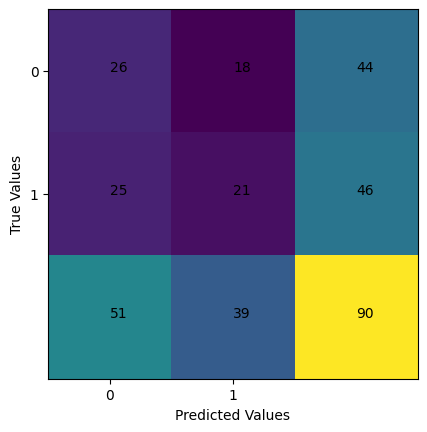

In [25]:
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(j,i, '%d'%cm[i,j])
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [26]:
#classificaiton Reports

In [29]:
cr = metrics.classification_report(y_test, y_pred, target_names = ['male', 'female'], output_dict=True)

In [31]:
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.509804,0.590909,0.547368,44.000000
female,0.538462,0.456522,0.494118,46.000000
accuracy,0.522222,0.522222,0.522222,0.522222
macro avg,0.524133,0.523715,0.520743,90.000000
weighted avg,0.524451,0.522222,0.520151,90.000000


In [32]:
#Cohen's Kappan
metrics.cohen_kappa_score(y_test,y_pred)

np.float64(0.04726735598227472)

In [33]:
#ROC and AUC

In [35]:
fpr, tpr, thresh = metrics.roc_curve(y_test, y_prob[:,1])

In [36]:
fpr, tpr, thresh

(array([0.        , 0.02272727, 0.04545455, 0.04545455, 0.06818182,
        0.06818182, 0.11363636, 0.11363636, 0.22727273, 0.22727273,
        0.27272727, 0.27272727, 0.29545455, 0.29545455, 0.31818182,
        0.31818182, 0.40909091, 0.40909091, 0.5       , 0.5       ,
        0.54545455, 0.54545455, 0.56818182, 0.56818182, 0.59090909,
        0.59090909, 0.63636364, 0.63636364, 0.65909091, 0.65909091,
        0.68181818, 0.68181818, 0.72727273, 0.72727273, 0.79545455,
        0.79545455, 0.86363636, 0.86363636, 0.93181818, 0.93181818,
        1.        ]),
 array([0.        , 0.        , 0.        , 0.06521739, 0.06521739,
        0.08695652, 0.08695652, 0.13043478, 0.13043478, 0.15217391,
        0.15217391, 0.26086957, 0.26086957, 0.2826087 , 0.2826087 ,
        0.34782609, 0.34782609, 0.36956522, 0.36956522, 0.43478261,
        0.43478261, 0.45652174, 0.45652174, 0.5       , 0.5       ,
        0.56521739, 0.56521739, 0.60869565, 0.60869565, 0.63043478,
        0.63043478, 0.6521

In [37]:
auc_s = metrics.auc(fpr,tpr)

In [38]:
auc_s

np.float64(0.44762845849802374)

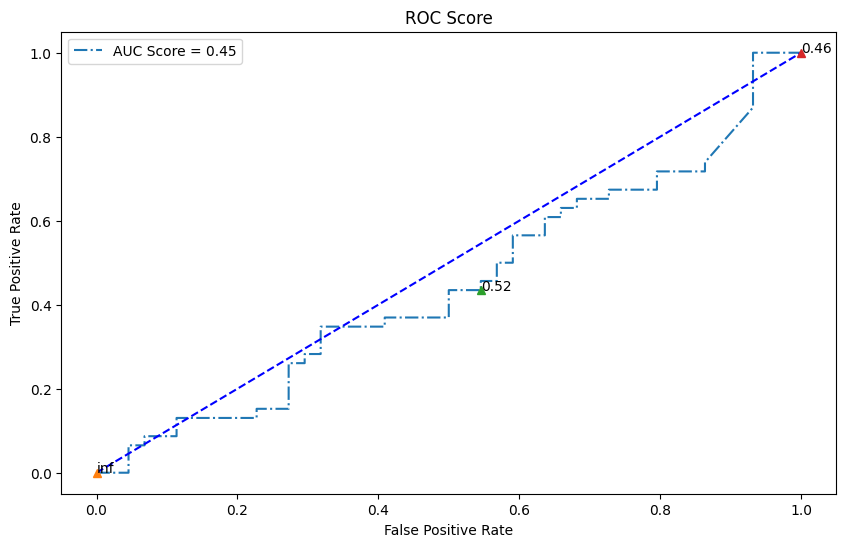

In [41]:
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, '-.')
plt.plot([0,1],[0,1], 'b--')

for i in range (0, len(thresh), 20):
    plt.plot(fpr[i], tpr[i], '^')
    plt.text(fpr[i], tpr[i], "%0.2f"%thresh[i])
plt.legend(['AUC Score = %0.2f'%auc_s])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Score')
plt.show()


In [42]:
#hyperparameter tuning

In [43]:
model_tune = SVC()

In [44]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {'C':[1,10,20], 'kernel':['rbf','poly'], 'gamma': [0.1,0.01,0.001]}

In [52]:
model_grid = GridSearchCV(model_tune, param_grid=param_grid,scoring='accuracy', cv=5, verbose=2)

In [53]:
model_grid.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [54]:
model_grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [55]:
model_grid.best_score_

np.float64(0.5622222222222222)

In [56]:
model_best = SVC(C=10, kernel='rbf', gamma=0.01, probability=True)

In [57]:
model_best.fit(X_train, y_train)

SVC(C=10, gamma=0.01, probability=True)

In [58]:
model_best.score(X_test, y_test)

0.4888888888888889

In [59]:
y_pred = model_best.predict(X_test)
y_prob = model_best.predict_proba(X_test)

In [60]:
metrics.cohen_kappa_score(y_test, y_pred)

np.float64(-0.016699410609037235)

In [62]:
fpr, tpr, thresh = metrics.roc_curve(y_test, y_prob[:,1])

In [63]:
auc_s = metrics.auc(fpr, tpr)

In [64]:
auc_s

np.float64(0.47233201581027673)

In [65]:
import pickle

In [68]:
pickle.dump(model_best, open('./model/model_svm.pickle', 'wb'))

In [69]:
pickle.dump(mean, open('./model/mean_preprocess.pickle', 'wb'))